In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [6]:
import zipfile
import pandas as pd
import os

# Extract the zip file
with zipfile.ZipFile(r'archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract to current directory

print("Files extracted:", os.listdir('.'))

Files extracted: ['.anaconda', '.conda', '.condarc', '.continuum', '.gradio', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ssh', '.virtual_documents', '.vscode', '.wdm', '3D Objects', 'amnaSajawal.html', 'anaconda3', 'app.py file', 'AppData', 'Application Data', 'archive (1).zip', 'battery-report.html', 'calculater dashbord.ipynb', 'calculre.ipynb', 'Contacts', 'Cookies', 'cover letter 2.docx', 'css', 'daraz_perfumes.csv', 'dashboard.py', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'finance.db', 'financial_coach.db', 'financial_coach_pro.db', 'finencial coach.ipynb', 'finencial mngmnt.ipynb', 'heart des.ipynb', 'heart_model.pkl', 'import pandas as pd.py', 'import streamlit as st.py', 'index.html', 'IntelGraphicsProfiles', 'JS', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'New folder', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a855f201-c5fa-11ed-8336-080027ec4824}.TM.blf', 'NTUSER.DAT{a855f201-c5fa-11ed-8336-0800

In [7]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {len(df.columns)}")

✅ Dataset loaded successfully!
📊 Dataset Shape: (7043, 21)
📋 Columns: 21


In [8]:
# Display basic information
print("=== DATASET BASIC INFO ===")
print(df.info())

# Display first few rows
print("\n=== FIRST 5 ROWS ===")
display(df.head())  # Using display() for better formatting in Jupyter

# Check target variable distribution
print("\n=== TARGET VARIABLE (Churn) DISTRIBUTION ===")
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print(f"Churn Value Counts:")
print(churn_counts)
print(f"\nChurn Percentage:")
for value, percentage in churn_percent.items():
    print(f"  {value}: {percentage:.2f}%")

# Check data types
print("\n=== DATA TYPES ===")
print(df.dtypes)

# Check for missing values
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

=== DATASET BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== TARGET VARIABLE (Churn) DISTRIBUTION ===
Churn Value Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
  No: 73.46%
  Yes: 26.54%

=== DATA TYPES ===
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

=== MISSING VALUES ===
Series([], dtype: int64)


In [9]:
# Numerical columns summary
print("=== NUMERICAL COLUMNS SUMMARY ===")
print(df.describe())

# Categorical columns summary
print("\n=== CATEGORICAL COLUMNS SUMMARY (First 5) ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col}:")
    print(df[col].value_counts().head())

=== NUMERICAL COLUMNS SUMMARY ===
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

=== CATEGORICAL COLUMNS SUMMARY (First 5) ===

customerID:
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
Name: count, dtype: int64

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


In [10]:
print("=== DATA CLEANING ===")

# Check what's in TotalCharges that's making it object type
print("Unique values in TotalCharges before cleaning:")
print(df['TotalCharges'].unique()[:10])  # Show first 10 unique values

# Convert TotalCharges to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if we got any NaN values after conversion
print(f"\nMissing values in TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")

# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Verify the changes
print("\n=== AFTER CLEANING ===")
print(f"TotalCharges dtype: {df['TotalCharges'].dtype}")
print(f"SeniorCitizen unique values: {df['SeniorCitizen'].unique()}")

=== DATA CLEANING ===
Unique values in TotalCharges before cleaning:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']

Missing values in TotalCharges after conversion: 11

=== AFTER CLEANING ===
TotalCharges dtype: float64
SeniorCitizen unique values: ['No' 'Yes']


In [11]:
# Handle the newly created missing values in TotalCharges
print("=== HANDLING MISSING VALUES ===")

# Check rows with missing TotalCharges
if df['TotalCharges'].isnull().sum() > 0:
    print("Rows with missing TotalCharges:")
    missing_total_charges = df[df['TotalCharges'].isnull()]
    print(f"Number of rows: {len(missing_total_charges)}")
    print(f"These customers have tenure: {missing_total_charges['tenure'].unique()}")
    
    # Fill missing TotalCharges with 0 (likely new customers)
    df['TotalCharges'].fillna(0, inplace=True)
    print("✅ Missing TotalCharges filled with 0")

print(f"Remaining missing values: {df.isnull().sum().sum()}")

=== HANDLING MISSING VALUES ===
Rows with missing TotalCharges:
Number of rows: 11
These customers have tenure: [0]
✅ Missing TotalCharges filled with 0
Remaining missing values: 0


C:\Users\Laptop State\AppData\Local\Temp\ipykernel_17748\3777825871.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [12]:
#Final Data Verification
print("=== FINAL DATA VERIFICATION ===")
print(f"Dataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

=== FINAL DATA VERIFICATION ===
Dataset shape: (7043, 21)

Data types:
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Missing values per column:
Series([], dtype: int64)


In [13]:
#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Visualization libraries imported!")

✅ Visualization libraries imported!


=== CHURN BY DEMOGRAPHIC FEATURES ===


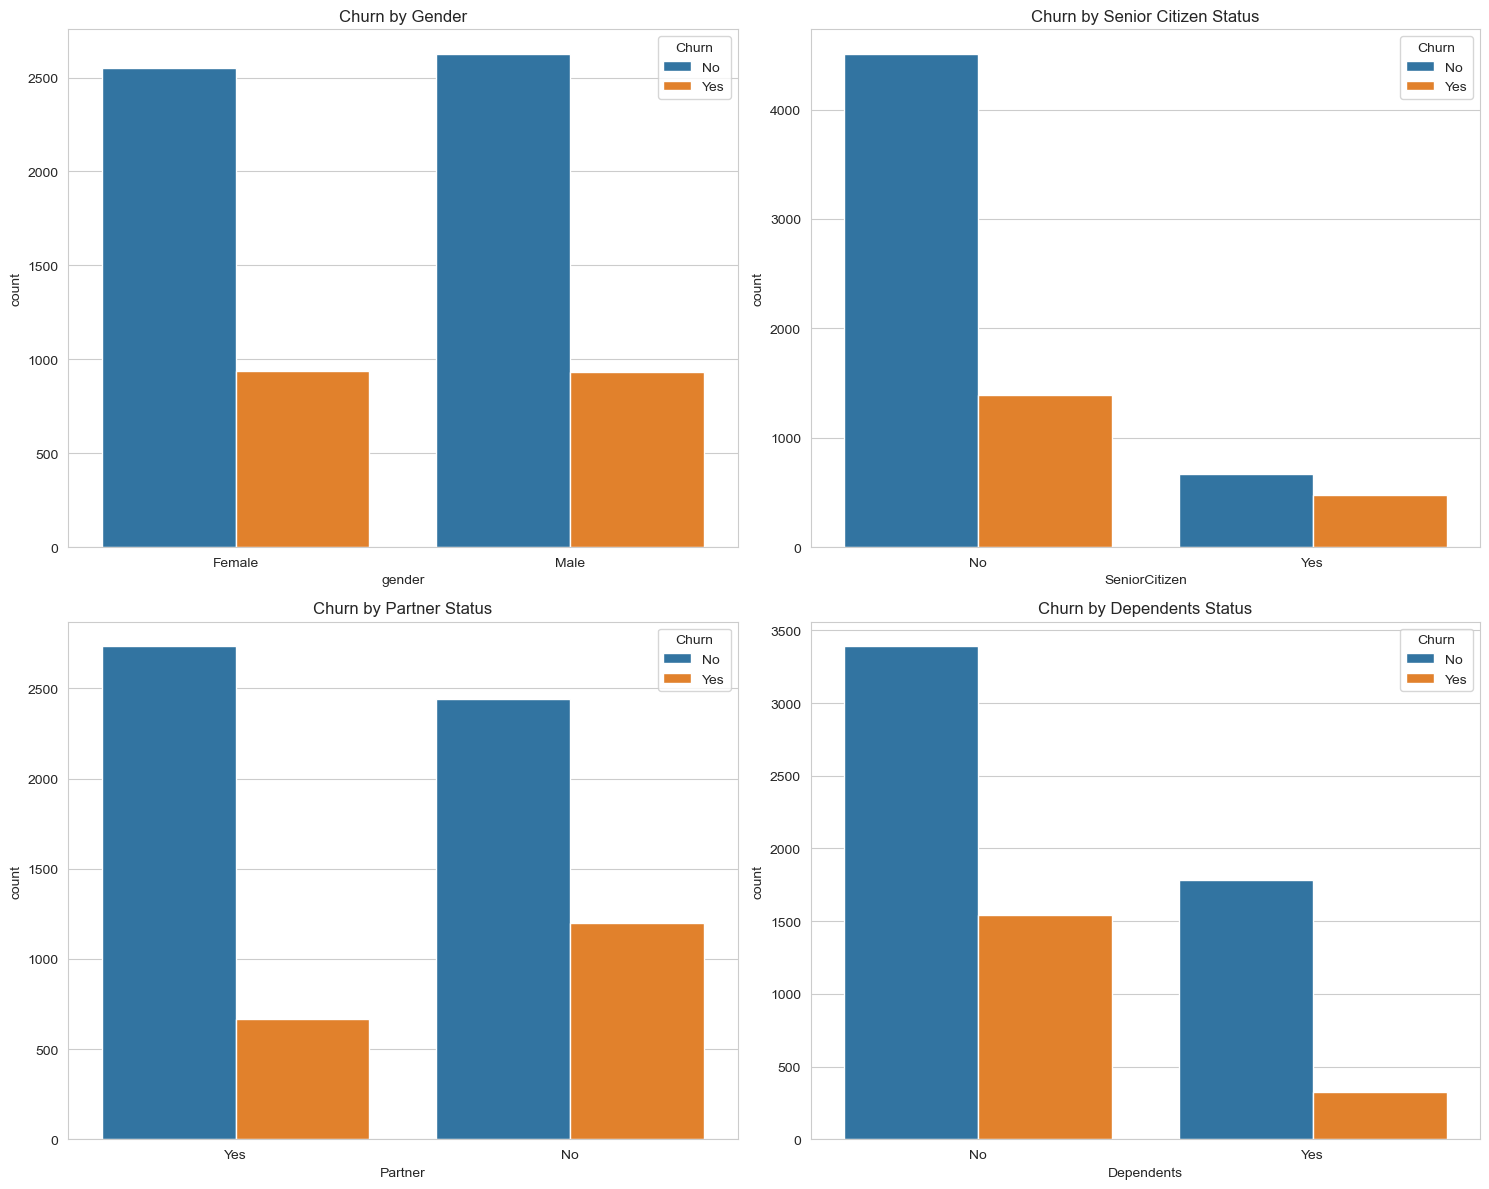

In [14]:
#Churn Distribution by Demographics
print("=== CHURN BY DEMOGRAPHIC FEATURES ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gender vs Churn
sns.countplot(data=df, x='gender', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Gender')

# Senior Citizen vs Churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Senior Citizen Status')

# Partner vs Churn
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Partner Status')

# Dependents vs Churn
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Dependents Status')

plt.tight_layout()
plt.show()

=== CHURN BY SERVICE FEATURES ===


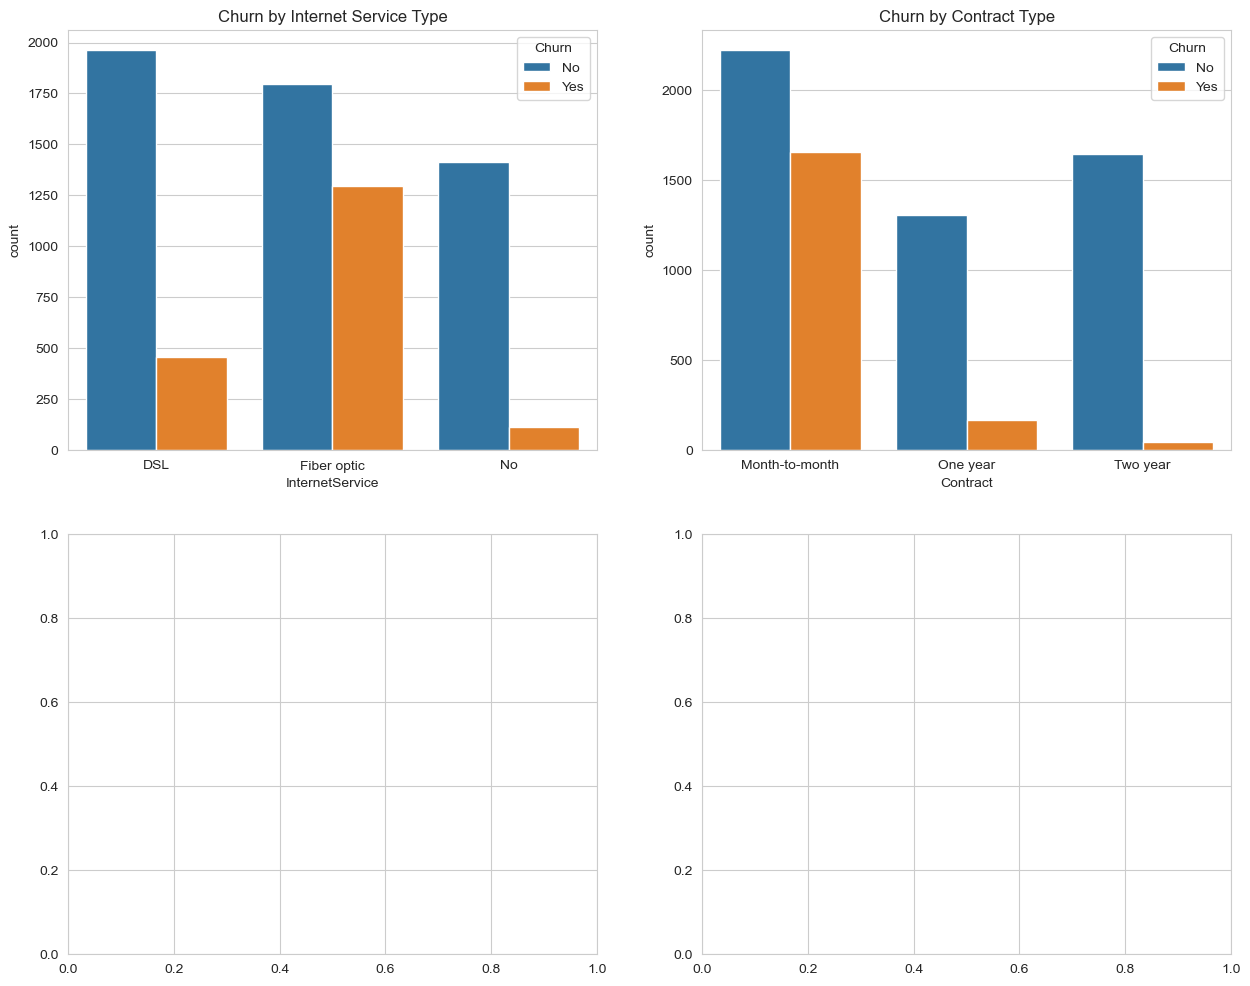

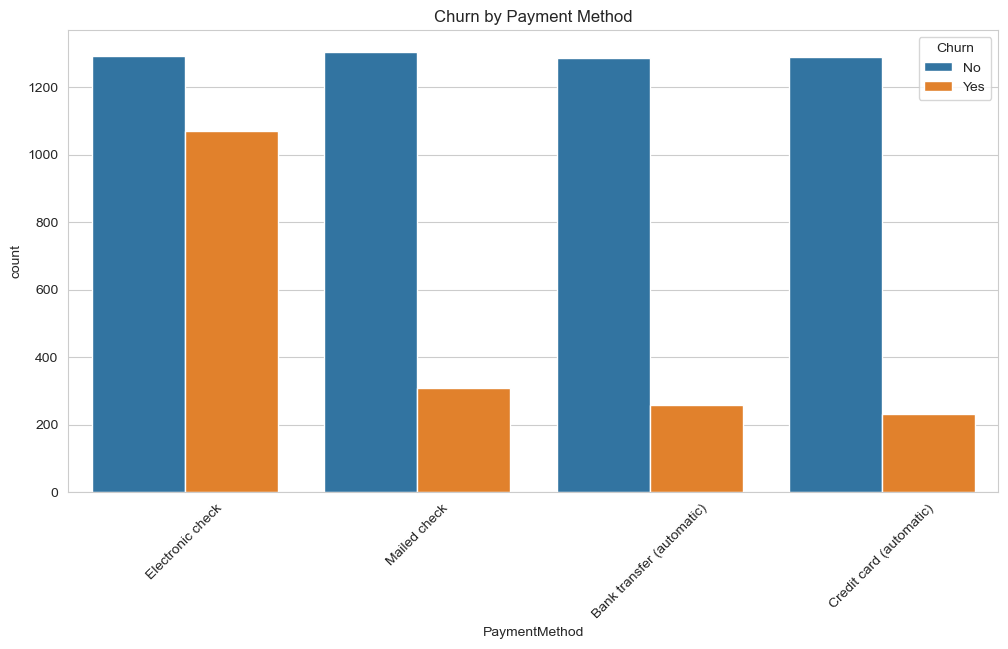

Text(0.5, 1.0, 'Churn by Paperless Billing')

In [15]:
#Churn by Service Features
print("=== CHURN BY SERVICE FEATURES ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Internet Service Type')

# Contract vs Churn
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Contract Type')

# Payment Method vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Paperless Billing vs Churn
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Paperless Billing')

=== NUMERICAL FEATURES ANALYSIS ===


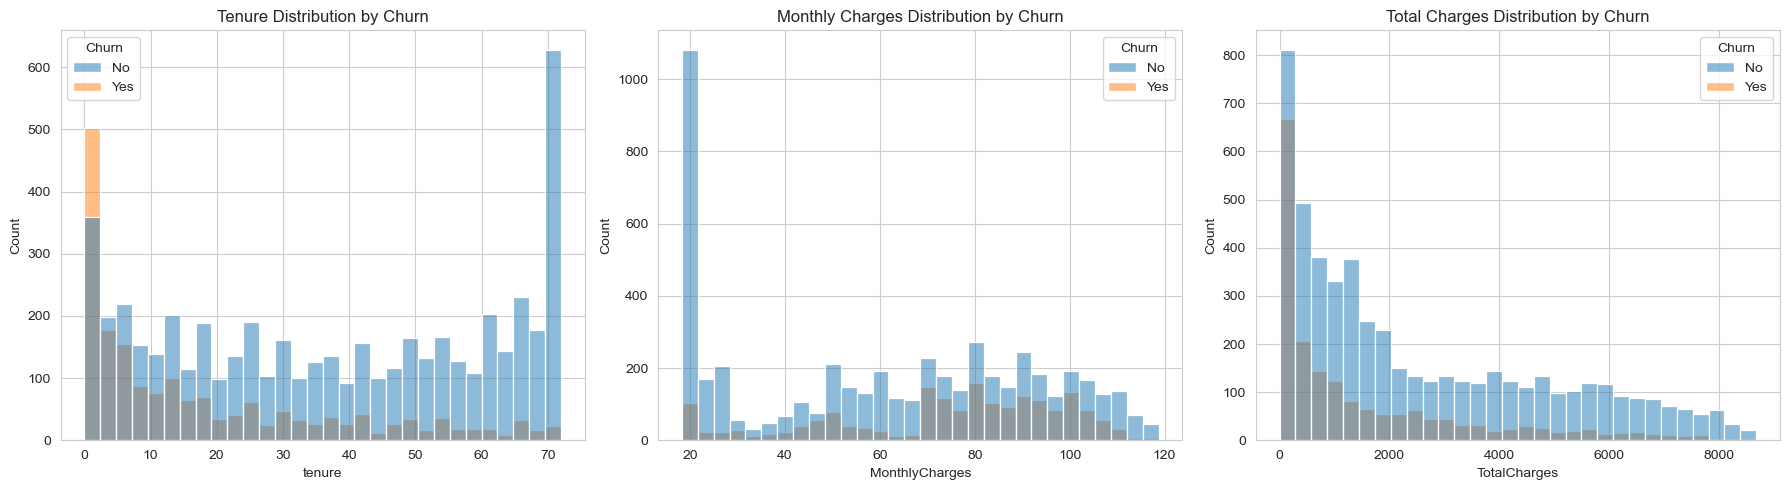

In [16]:
#Numerical Features Analysis
print("=== NUMERICAL FEATURES ANALYSIS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure distribution by Churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn')

# Monthly Charges by Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn')

# Total Charges by Churn
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, ax=axes[2])
axes[2].set_title('Total Charges Distribution by Churn')

plt.tight_layout()
plt.show()

In [17]:
#Statistical Summary by Churn Status
print("=== STATISTICAL SUMMARY BY CHURN STATUS ===")

# Group by churn and describe numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_summary = df.groupby('Churn')[numerical_cols].describe()

print("Summary statistics for numerical features by Churn:")
display(churn_summary)

=== STATISTICAL SUMMARY BY CHURN STATUS ===
Summary statistics for numerical features by Churn:


tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      MonthlyCharges             ...               TotalCharges               \
               count       mean  ...   75%     max        count         mean   
Churn                            ...                                           
No            5174.0  61.265124  ...  88.4  118.75       5174.0  2549.911442   
Yes           1869.0  74.441332  ...  94.2  118.35       1869.0  1531.796094   

                                                              
               std    min    25%       50%      75%      max  
Churn                                                         
No     2329.954215   0.00  572.9  1679.525  4262.85  8672.45  
Yes    1890.822994  18.85  134.5   703.550  2331.30  8684.80  

[2 rows x 24 columns]

=== BOX PLOTS - NUMERICAL FEATURES BY CHURN ===


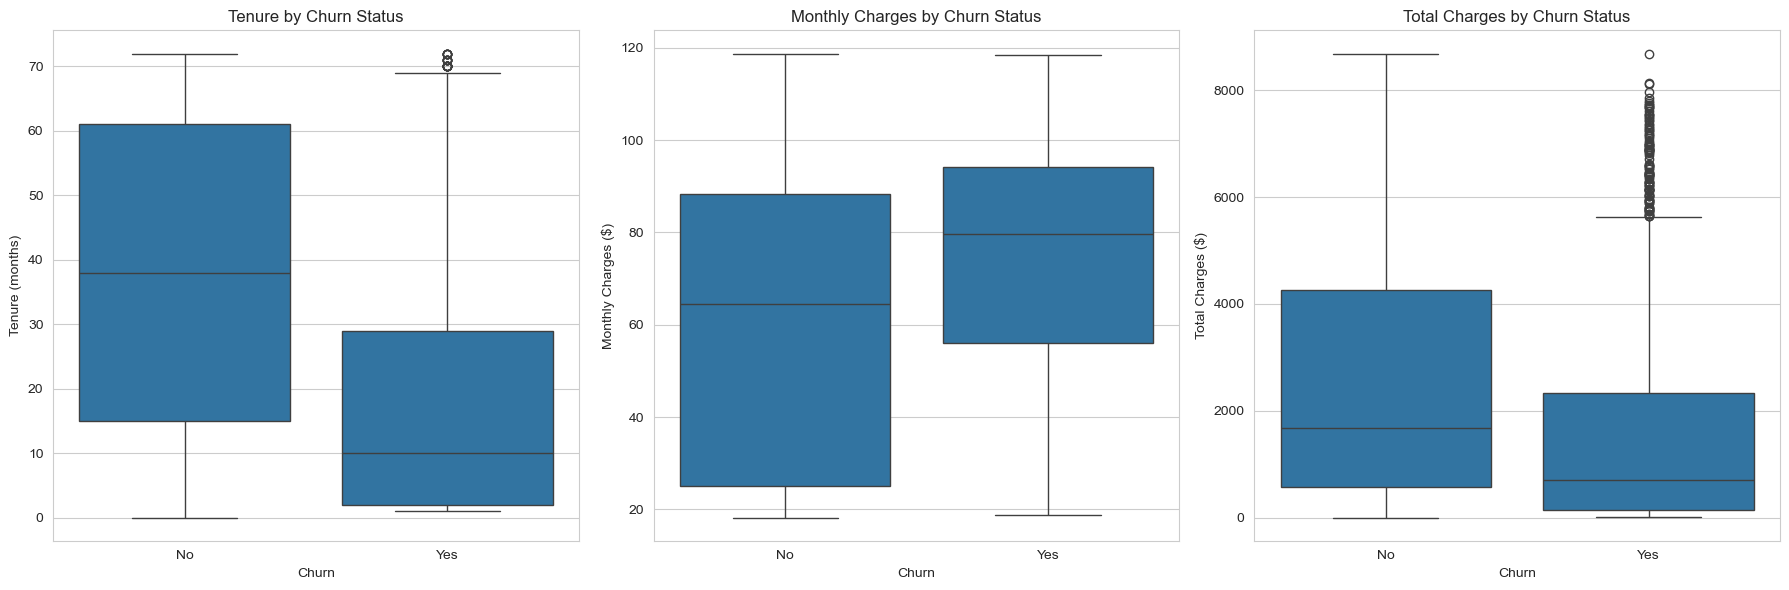

In [18]:
#Box Plots for Numerical Features
print("=== BOX PLOTS - NUMERICAL FEATURES BY CHURN ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure by Churn Status')
axes[0].set_ylabel('Tenure (months)')

# Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status')
axes[1].set_ylabel('Monthly Charges ($)')

# Total Charges vs Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges', ax=axes[2])
axes[2].set_title('Total Charges by Churn Status')
axes[2].set_ylabel('Total Charges ($)')

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===


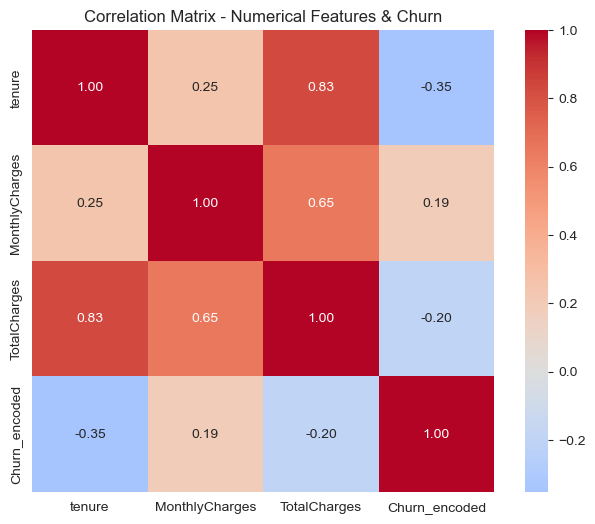

Correlation with Churn:
Churn_encoded     1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn_encoded, dtype: float64


In [19]:
# corealtion analysis
print("=== CORRELATION ANALYSIS ===")

# Create a copy with encoded churn for correlation
df_corr = df.copy()
df_corr['Churn_encoded'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numerical columns for correlation
correlation_matrix = df_corr[numerical_cols + ['Churn_encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix - Numerical Features & Churn')
plt.show()

print("Correlation with Churn:")
print(correlation_matrix['Churn_encoded'].sort_values(ascending=False))

=== DETAILED TENURE ANALYSIS ===
Churn Rate by Tenure Group:
tenure_group
0-12     47.678161
13-24    28.710938
25-36    21.634615
37-48    19.028871
49-60    14.423077
61+       6.609808
Name: Yes, dtype: float64


C:\Users\Laptop State\AppData\Local\Temp\ipykernel_17748\888277060.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


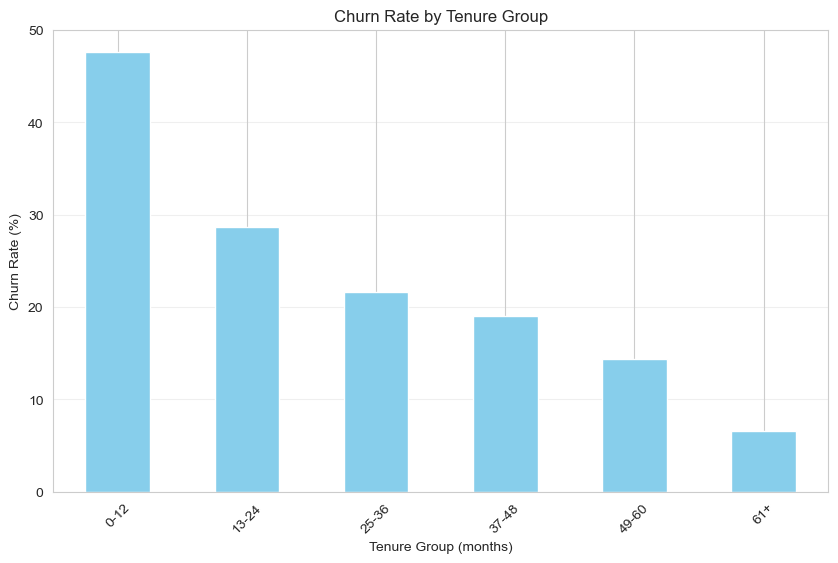

In [20]:
#Tenure Analysis - Detailed
print("=== DETAILED TENURE ANALYSIS ===")

# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 36, 48, 60, 72], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61+'])

# Churn rate by tenure group
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
tenure_churn_percentage = tenure_churn['Yes'] * 100

print("Churn Rate by Tenure Group:")
print(tenure_churn_percentage)

plt.figure(figsize=(10, 6))
tenure_churn_percentage.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

=== MONTHLY CHARGES vs TENURE ===


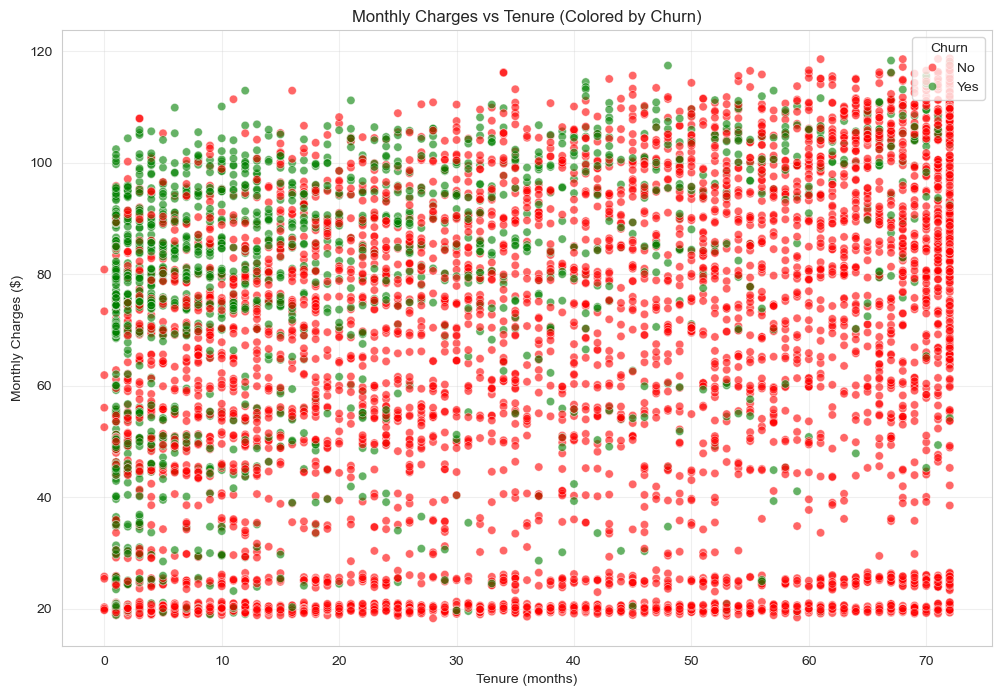

In [21]:
#Monthly Charges vs Tenure Scatter Plot
print("=== MONTHLY CHARGES vs TENURE ===")

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', 
                         hue='Churn', alpha=0.6, palette=['red', 'green'])
plt.title('Monthly Charges vs Tenure (Colored by Churn)')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn', loc='upper right')
plt.grid(alpha=0.3)
plt.show()

In [22]:
print("=== SIMPLE PATTERN DISCOVERY ===")

# Pattern 1: Average values for churners vs non-churners
print("1. AVERAGE VALUES COMPARISON:")
avg_comparison = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print(avg_comparison)

print("\n" + "="*50)

# Pattern 2: Key differences
print("2. KEY DIFFERENCES:")
print(f"• Churners have {avg_comparison.loc['Yes','tenure']:.1f} months tenure vs {avg_comparison.loc['No','tenure']:.1f} months for non-churners")
print(f"• Churners pay ${avg_comparison.loc['Yes','MonthlyCharges']:.2f} monthly vs ${avg_comparison.loc['No','MonthlyCharges']:.2f} for non-churners")

print("\n" + "="*50)

# Pattern 3: Simple tenure analysis
print("3. TENURE PATTERNS:")
tenure_churn_simple = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
print("Churn percentage by tenure group:")
print((tenure_churn_simple['Yes'] * 100).round(1))

=== SIMPLE PATTERN DISCOVERY ===
1. AVERAGE VALUES COMPARISON:
          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2549.911442
Yes    17.979133       74.441332   1531.796094

2. KEY DIFFERENCES:
• Churners have 18.0 months tenure vs 37.6 months for non-churners
• Churners pay $74.44 monthly vs $61.27 for non-churners

3. TENURE PATTERNS:
Churn percentage by tenure group:
tenure_group
0-12     47.7
13-24    28.7
25-36    21.6
37-48    19.0
49-60    14.4
61+       6.6
Name: Yes, dtype: float64


C:\Users\Laptop State\AppData\Local\Temp\ipykernel_17748\2864080694.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_simple = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


In [23]:
#Create New Features Based on Our Insights
print("=== FEATURE ENGINEERING ===")

# Create new features based on our pattern discoveries
df_encoded = df.copy()

# 1. Based on tenure pattern: Create tenure segments
df_encoded['is_new_customer'] = (df_encoded['tenure'] <= 12).astype(int)
df_encoded['is_long_term_customer'] = (df_encoded['tenure'] > 24).astype(int)

# 2. Based on pricing pattern: Create price segments
df_encoded['is_high_spender'] = (df_encoded['MonthlyCharges'] > 70).astype(int)
df_encoded['monthly_charge_segment'] = pd.cut(df_encoded['MonthlyCharges'], 
                                            bins=[0, 35, 70, 105, 140], 
                                            labels=['Low', 'Medium', 'High', 'Very High'])

# 3. Create a "risk_score" based on our key findings
df_encoded['risk_score'] = 0
df_encoded['risk_score'] += (df_encoded['tenure'] <= 12) * 2  # New customers = high risk
df_encoded['risk_score'] += (df_encoded['MonthlyCharges'] > 70) * 1  # High spenders = medium risk

print("✅ New features created!")
print("New features added:")
new_features = ['is_new_customer', 'is_long_term_customer', 'is_high_spender', 'monthly_charge_segment', 'risk_score']
for feature in new_features:
    print(f"  - {feature}")

=== FEATURE ENGINEERING ===
✅ New features created!
New features added:
  - is_new_customer
  - is_long_term_customer
  - is_high_spender
  - monthly_charge_segment
  - risk_score


In [24]:
#Encode Categorical Variables
print("=== ENCODING CATEGORICAL VARIABLES ===")

# List of categorical columns to encode
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling', 'PaymentMethod', 'monthly_charge_segment']

print(f"Categorical columns to encode: {len(categorical_columns)}")

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

print(f"✅ Encoding complete! New shape: {df_encoded.shape}")
print(f"Original features: 21 → New features: {df_encoded.shape[1]}")

=== ENCODING CATEGORICAL VARIABLES ===
Categorical columns to encode: 16
✅ Encoding complete! New shape: (7043, 40)
Original features: 21 → New features: 40


In [25]:
#Prepare Data for Modeling
print("=== PREPARE DATA FOR MODELING ===")

# Drop columns we won't use for modeling
df_final = df_encoded.drop(['customerID', 'tenure_group'], axis=1, errors='ignore')

# Encode the target variable
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Churn distribution: {y.value_counts().to_dict()}")

=== PREPARE DATA FOR MODELING ===
Features shape: (7043, 37)
Target shape: (7043,)
Churn distribution: {0: 5174, 1: 1869}


In [26]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Train-Test Split Complete!")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training churn rate: {y_train.mean():.3f}")
print(f"Testing churn rate: {y_test.mean():.3f}")

✅ Train-Test Split Complete!
Training set: (5634, 37)
Testing set: (1409, 37)
Training churn rate: 0.265
Testing churn rate: 0.265


In [28]:
print("=== CHECKING DATA TYPES ===")
print("Data types in X_train:")
print(X_train.dtypes.value_counts())

# Check for any remaining object/string columns
object_columns = X_train.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print(f"\n⚠️ Found {len(object_columns)} object columns that need encoding:")
    for col in object_columns:
        print(f"  - {col}: {X_train[col].unique()[:5]}")  # Show first 5 unique values
else:
    print("✅ No object columns found - data is ready for modeling!")

=== CHECKING DATA TYPES ===
Data types in X_train:
bool       29
int64       5
float64     2
object      1
Name: count, dtype: int64

⚠️ Found 1 object columns that need encoding:
  - SeniorCitizen: ['No' 'Yes']


In [29]:
print("=== COMPLETE DATA ENCODING ===")

# Let's start fresh from the original cleaned data
df_clean = df.copy()

# Step 1: Handle the numerical conversion we did earlier
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'].fillna(0, inplace=True)
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Step 2: Create our engineered features
df_clean['is_new_customer'] = (df_clean['tenure'] <= 12).astype(int)
df_clean['is_long_term_customer'] = (df_clean['tenure'] > 24).astype(int)
df_clean['is_high_spender'] = (df_clean['MonthlyCharges'] > 70).astype(int)

# Step 3: Encode ALL categorical variables (simple approach)
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                      'Contract', 'PaperlessBilling', 'PaymentMethod']

print("Encoding categorical columns...")
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)

# Step 4: Encode target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Step 5: Drop unnecessary columns
df_final = df_encoded.drop(['customerID', 'tenure_group'], axis=1, errors='ignore')

print(f"✅ Final dataset shape: {df_final.shape}")
print(f"Data types: {df_final.dtypes.value_counts()}")

=== COMPLETE DATA ENCODING ===
Encoding categorical columns...
✅ Final dataset shape: (7043, 33)
Data types: bool       26
int64       5
float64     2
Name: count, dtype: int64


C:\Users\Laptop State\AppData\Local\Temp\ipykernel_17748\3949331807.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(0, inplace=True)


In [30]:
print("=== PREPARE FOR MODELING ===")

# Separate features and target
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Churn distribution: {y.value_counts().to_dict()}")

# Verify no string data remains
print(f"\n✅ Data types check:")
print(X.dtypes.value_counts())
string_cols = X.select_dtypes(include=['object']).columns
print(f"String columns remaining: {len(string_cols)}")

=== PREPARE FOR MODELING ===
Features shape: (7043, 32)
Target shape: (7043,)
Churn distribution: {0: 5174, 1: 1869}

✅ Data types check:
bool       26
int64       4
float64     2
Name: count, dtype: int64
String columns remaining: 0


In [31]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train-Test Split Complete!")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training churn rate: {y_train.mean():.3f}")
print(f"Testing churn rate: {y_test.mean():.3f}")

✅ Train-Test Split Complete!
Training set: (5634, 32)
Testing set: (1409, 32)
Training churn rate: 0.265
Testing churn rate: 0.265


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("=== MODEL BUILDING ===")

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Show classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

=== MODEL BUILDING ===

--- Training Random Forest ---
Random Forest Accuracy: 0.7821

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409


--- Training Logistic Regression ---
Logistic Regression Accuracy: 0.7999

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



C:\Users\Laptop State\anaconda3\Local Disk\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== FEATURE IMPORTANCE ===
Top 15 Most Important Features:


,feature,importance
2,TotalCharges,0.184836
1,MonthlyCharges,0.163169
0,tenure,0.152799
12,InternetService_Fiber optic,0.043117
30,PaymentMethod_Electronic check,0.037115
6,gender_Male,0.028988
3,is_new_customer,0.027609
28,PaperlessBilling_Yes,0.026290
4,is_long_term_customer,0.025857
7,Partner_Yes,0.024165


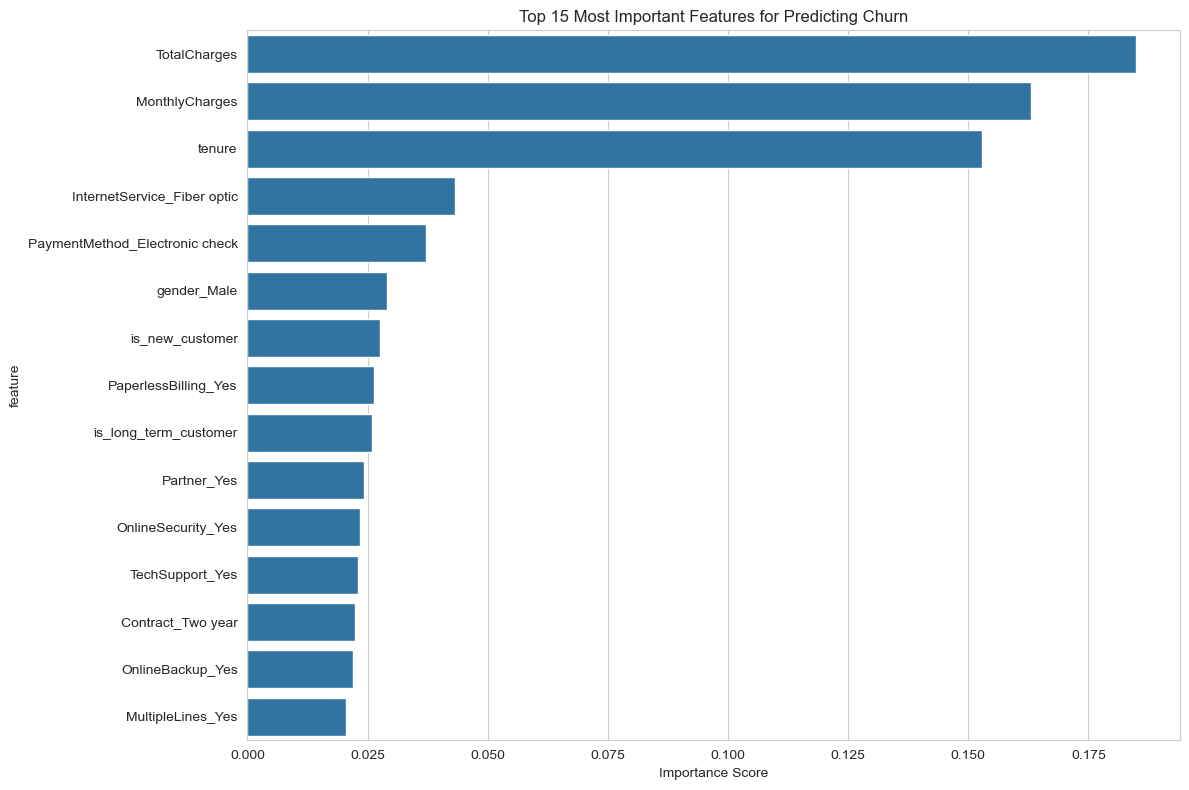

In [33]:
print("=== FEATURE IMPORTANCE ===")

# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
display(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features for Predicting Churn')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

=== CONFUSION MATRIX ===


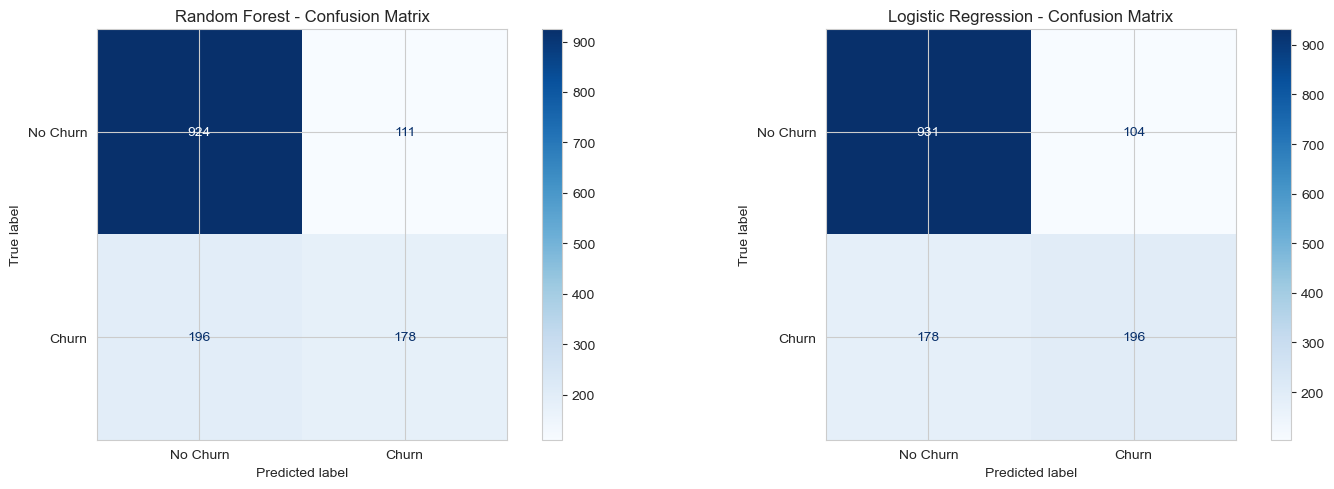

Confusion Matrix Interpretation:
• Top-Left: Correctly predicted 'No Churn' (True Negative)
• Top-Right: Wrongly predicted 'Churn' as 'No Churn' (False Negative)
• Bottom-Left: Wrongly predicted 'No Churn' as 'Churn' (False Positive)
• Bottom-Right: Correctly predicted 'Churn' (True Positive)


In [34]:
print("=== CONFUSION MATRIX ===")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Random Forest Confusion Matrix
y_pred_rf = models['Random Forest'].predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Churn'])
disp_rf.plot(ax=ax1, cmap='Blues')
ax1.set_title('Random Forest - Confusion Matrix')

# Logistic Regression Confusion Matrix
y_pred_lr = models['Logistic Regression'].predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Churn', 'Churn'])
disp_lr.plot(ax=ax2, cmap='Blues')
ax2.set_title('Logistic Regression - Confusion Matrix')

plt.tight_layout()
plt.show()

print("Confusion Matrix Interpretation:")
print("• Top-Left: Correctly predicted 'No Churn' (True Negative)")
print("• Top-Right: Wrongly predicted 'Churn' as 'No Churn' (False Negative)")
print("• Bottom-Left: Wrongly predicted 'No Churn' as 'Churn' (False Positive)")
print("• Bottom-Right: Correctly predicted 'Churn' (True Positive)")

In [35]:
import joblib

print("=== SAVING THE MODEL ===")

# Save the Random Forest model (you can choose Logistic Regression if you prefer)
best_model = models['Random Forest']
joblib.dump(best_model, 'churn_prediction_model.pkl')

# Also save the column names for later use
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("✅ Model saved as 'churn_prediction_model.pkl'")
print("✅ Model columns saved as 'model_columns.pkl'")
print(f"Model can be loaded with: joblib.load('churn_prediction_model.pkl')")

=== SAVING THE MODEL ===
✅ Model saved as 'churn_prediction_model.pkl'
✅ Model columns saved as 'model_columns.pkl'
Model can be loaded with: joblib.load('churn_prediction_model.pkl')


In [36]:
!pip install streamlit